### Scikit-Learn
- iris Classification - Decision Tree, SVM, Logistic Regression

#### 1. Data Preprocessing

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()

In [5]:
type(iris)

sklearn.utils.Bunch

In [6]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [7]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [9]:
# Dictionary 를 편리하게 사용할 수 있게 만들어주는 sklearn.utils.Bunch 객체
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [12]:
# Feature data - X, numpy dimensional array
iris.data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [13]:
# ndarray = numpy dimensional array
type(iris.data)

numpy.ndarray

In [15]:
# Feature name (column name)
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [17]:
feature_names = [name[:-5] for name in iris.feature_names]

In [20]:
import pandas as pd
df = pd.DataFrame(iris.data, columns = feature_names)
df['target'] = iris.target # y data
df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [21]:
import numpy as np
np.unique(iris.target, return_counts=True)

(array([0, 1, 2]), array([50, 50, 50], dtype=int64))

In [22]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [27]:
df.groupby('target').describe()

sepal length                                             sepal width  \
              count   mean       std  min    25%  50%  75%  max       count   
target                                                                        
0              50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8        50.0   
1              50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0        50.0   
2              50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9        50.0   

               ... petal length      petal width                             \
         mean  ...          75%  max       count   mean       std  min  25%   
target         ...                                                            
0       3.428  ...        1.575  1.9        50.0  0.246  0.105386  0.1  0.2   
1       2.770  ...        4.600  5.1        50.0  1.326  0.197753  1.0  1.2   
2       2.974  ...        5.875  6.9        50.0  2.026  0.274650  1.4  1.8   

                       
        50%  75%  max  
target                 
0       0.2  0.3  0.6  
1       1.3  1.5  1.8  
2       2.0  2.3  2.5  

[3 rows x 32 columns]

In [28]:
df.groupby('target').describe().loc[:,'sepal length']

,count,mean,std,min,25%,50%,75%,max
target,,,,,,,,
0,50.0,5.006,0.352490,4.3,4.800,5.0,5.2,5.8
1,50.0,5.936,0.516171,4.9,5.600,5.9,6.3,7.0
2,50.0,6.588,0.635880,4.9,6.225,6.5,6.9,7.9


In [29]:
df.groupby('target').agg(['mean','std'])

sepal length           sepal width           petal length            \
               mean       std        mean       std         mean       std   
target                                                                       
0             5.006  0.352490       3.428  0.379064        1.462  0.173664   
1             5.936  0.516171       2.770  0.313798        4.260  0.469911   
2             6.588  0.635880       2.974  0.322497        5.552  0.551895   

       petal width            
              mean       std  
target                        
0            0.246  0.105386  
1            1.326  0.197753  
2            2.026  0.274650

In [30]:
import matplotlib.pyplot as plt

setosa = df[df.target == 0].iloc[:, :-1]
setosa.shape

(50, 4)

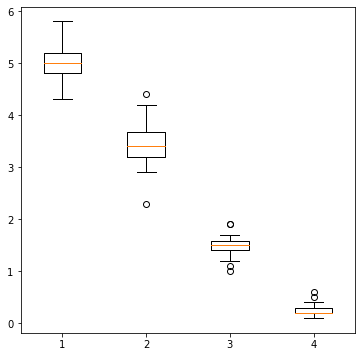

In [35]:
plt.figure(figsize=(6, 6))

plt.boxplot(setosa)
plt.show()

In [36]:
df.target.value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

#### 2. train test split

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=2021) # train : test = 3 : 1
# 2차원 이상은 대문자, 1차원은 소문자로 표시
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape) 

(112, 4)
(38, 4)
(112,)
(38,)


In [40]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2]), array([34, 36, 42], dtype=int64))

In [43]:
# y 값을 균등하게 뽑으려면 stratify 옵션을 설정
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=2021, stratify=iris.target) 
np.unique(y_train, return_counts=True)

(array([0, 1, 2]), array([37, 37, 38], dtype=int64))

In [44]:
#test size 비율을 20%로 설정
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=2021, test_size=0.2)
# train size는 잘 사용하지 않음
np.unique(y_train, return_counts=True)

(array([0, 1, 2]), array([36, 40, 44], dtype=int64))

#### 3. train
- Decision Tree

In [45]:
from sklearn.tree import DecisionTreeClassifier
# 모델 생성 - 객체 생성
dtc = DecisionTreeClassifier(random_state=2022)

In [46]:
dtc.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 2022,
 'splitter': 'best'}

In [47]:
# 학습(훈련)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=2022)

#### 4. predict

In [48]:
pred_dt = dtc.predict(X_test)

In [49]:
res = pd.DataFrame({'y':y_test, 'DT':pred_dt})

In [50]:
res

,y,DT
0,0,0
1,0,0
2,1,1
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


#### 5. evaluation

In [51]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred_dt)

1.0

In [54]:
# 4, 5번을 한꺼번에 수행
dtc.score(X_test, y_test)

1.0

### Support Vector Machine (SVM)

In [55]:
# 3) create model and train
from sklearn.svm import SVC
svc = SVC(random_state = 2022)

svc.fit(X_train, y_train)

SVC(random_state=2022)

In [56]:
# 4) predict
pred_svc = svc.predict(X_test)

In [57]:
# 5) evaluation
accuracy_score(y_test, pred_svc)

1.0

### Logistic Regression

In [60]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=500,random_state = 2022)

lr.fit(X_train, y_train)

LogisticRegression(max_iter=500, random_state=2022)

In [61]:
pred_lr = lr.predict(X_test)

In [62]:
accuracy_score(y_test, pred_lr)

1.0

In [63]:
# max_iter 의 기본값이 100인데, 너무 낮은 상태이기 때문에 에러가 발생할 수 있음
lr_2 = LogisticRegression(random_state = 2022)
lr_2.fit(X_train, y_train)

LogisticRegression(random_state=2022)

In [64]:
# max_iter의 조절 이외 문제 해결을 위해 추천되는 방법
from sklearn.preprocessing import MinMaxScaler
iris_scaled = MinMaxScaler().fit_transform(iris.data)

In [68]:
iris.data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [66]:
iris_scaled[:5]

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667]])

In [70]:
# y 값은 변하지 않으므로 리턴값을 받지 않아도 됨
X_train_2, X_test_2, _, _ = train_test_split(iris_scaled, iris.target, stratify=iris.target, test_size=0.2, random_state=2022)

In [72]:
lr_2.fit(X_train_2, y_train)

LogisticRegression(random_state=2022)

#### model comparision

In [77]:
dtc.score(X_test, y_test), svc.score(X_test, y_test), lr.score(X_test, y_test)

(1.0, 1.0, 1.0)

In [79]:
res['SVC'] = pred_svc
res['lr'] = pred_lr

In [81]:
res.head()

,y,DT,SVC,lr
0,0,0,0,0
1,0,0,0,0
2,1,1,1,1
3,0,0,0,0
4,0,0,0,0
